In [1]:
#For Local interpretability methods
#This file is to get top 5 features for all programs. It creates a dataframe with 5 rows and columns (number of colums are equal to number of methods)
#This file gets the result files per program (every program result file contains results for 150 observations and 29 features),it then processes every program's results and gets top 5 features.
#It then calculates the correlation matrix based on intersction between two program's top 5 features.
#Lastly creates the heatmap based on correlation matrix

In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv("./Data/dataforheatmap/Localmethods_top5features_onefraudobservation.txt",sep='\t')
print(data.columns)
newdffd = data[["LIME", "SHAP", "Treeinter","Eli5" ,"pyCeterisParibus","Ingredients" , "Vivo", "pyBreakdown_up" ,"pyBreakdown_down", "piBreakdown", "Anchor" ]]
new_data= pd.DataFrame(newdffd)

cols = new_data.columns
print(new_data)
newdf1 = pd.DataFrame(columns = cols)
newdf1['ind'] = cols
newdf7 = newdf1.set_index('ind')

for i in range(0,len(new_data.columns)):
    inner = new_data.columns[i+1:]
    if len(inner) != 0:
        for j in range(i+1,len(new_data.columns)):        
            intersect = len(pd.Index(new_data[new_data.columns[i]]).intersection(pd.Index(new_data[new_data.columns[j]])))
            perc = (intersect*100)/5
            newdf7[str(new_data.columns[j])][str(new_data.columns[i])] = perc
            newdf7[str(new_data.columns[i])][str(new_data.columns[j])] = perc

            
        for k in range(len(new_data.columns[:-1])):
            intersect = len(pd.Index(new_data[new_data.columns[i]]).intersection(pd.Index(new_data[new_data.columns[j]])))
            perc = int((intersect*100)/5)
            newdf7[str(new_data.columns[j])][str(new_data.columns[i])] = perc
            newdf7[str(new_data.columns[i])][str(new_data.columns[j])] = perc
               

newdf7 = newdf7.fillna(1)
newdf7.astype('int64')
print(newdf7)



Index(['LIME', 'SHAP', 'pyBreakdown_up', 'pyBreakdown_down', 'piBreakdown',
       'Anchor', 'Treeinter', 'pyCeterisParibus', 'Ingredients', 'Vivo',
       'Eli5'],
      dtype='object')
  LIME SHAP Treeinter Eli5 pyCeterisParibus Ingredients Vivo pyBreakdown_up  \
0  V14  V14       V10  V14              V14         V14  V14             V4   
1   V4  V10       V14  V10              V12         V12  V12             V3   
2  V12  V12       V12  V12              V10          V4  V10            V12   
3  V10   V4       V11  V11               V3         V10   V3            V11   
4  V11  V11        V4   V4               V4          V3   V4            V14   

  pyBreakdown_down piBreakdown Anchor  
0              V11          V3    V10  
1               V4         V12    V23  
2               V3         V11    V17  
3               V9         V16     V4  
4              V14         V10    V11  
                   LIME   SHAP  Treeinter   Eli5  pyCeterisParibus  \
ind                         

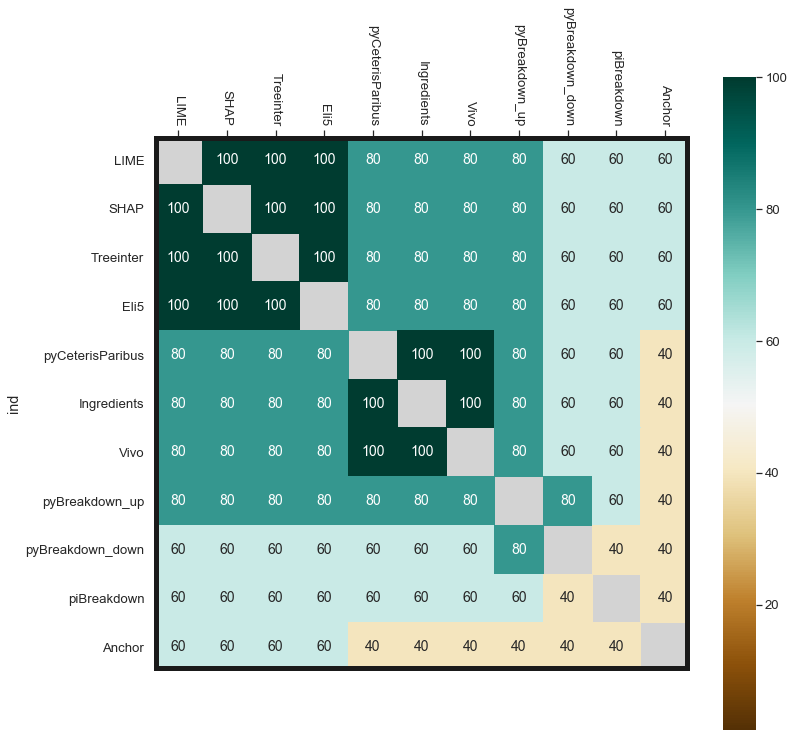

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.2)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_facecolor("lightgrey")
sn.heatmap(newdf7,annot=True, square=True, ax=ax,robust=True, cmap ="BrBG", annot_kws={"fontsize":14},fmt='g',mask=newdf7== 1)
ax.xaxis.set_ticks_position('top')
plt.setp(ax.get_yticklabels(), rotation=360)

ax.axhline(y=0, color='k',linewidth=10)
ax.axhline(y=newdf7.shape[1], color='k',linewidth=10)
ax.axvline(x=0, color='k',linewidth=10)
ax.axvline(x=newdf7.shape[0], color='k',linewidth=10)
b, t = plt.ylim()
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.xticks(rotation=270)
plt.savefig('Heatmap_localmethods_for1fraudinstance.png')
plt.show()

